# 🏥 Medical Insurance Cost Prediction
**Author:** Rishikesh Naware

### 📌 Project Overview
This project aims to predict the **medical insurance costs** for an individual based on their demographic and health information (age, gender, BMI, smoking status, etc.).

We will use **Linear Regression** to model the relationship between these features and the target variable (`charges`).

### 📂 Dataset Columns
* **age**: Age of primary beneficiary
* **sex**: Insurance contractor gender, female, male
* **bmi**: Body mass index (ideal is 18.5 to 24.9)
* **children**: Number of children covered by health insurance
* **smoker**: Smoking status
* **region**: The beneficiary's residential area in the US
* **charges**: Individual medical costs billed by health insurance

### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Loading Dataset

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Visualization

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Encoding Non-Numeric Columns

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 📊 Exploratory Data Analysis (EDA)
We will visualize the data to understand the distribution of key features and their relationship with insurance charges.

<Figure size 600x600 with 0 Axes>

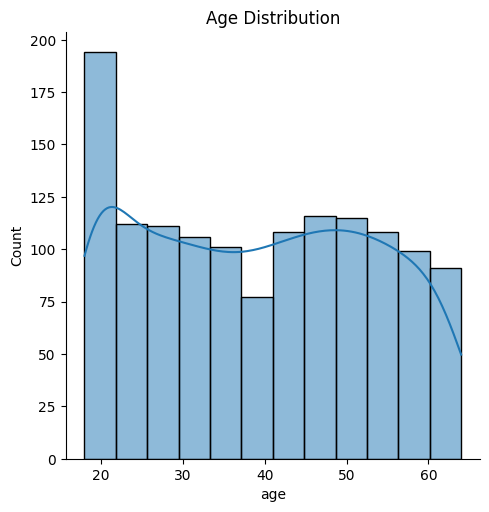

In [6]:
# Age Distribution Plot (Histogram)
plt.figure(figsize = (6,6))
sns.displot(data = df, x = 'age', kde = True)
plt.title('Age Distribution')
plt.show()

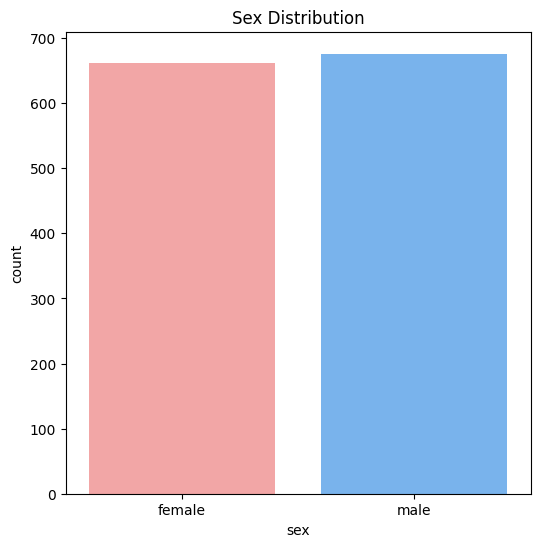

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df, hue='sex', palette={'female':'#FF9999', 'male':'#66B3FF'}, legend=False)
plt.title('Sex Distribution')
plt.show()

In [8]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

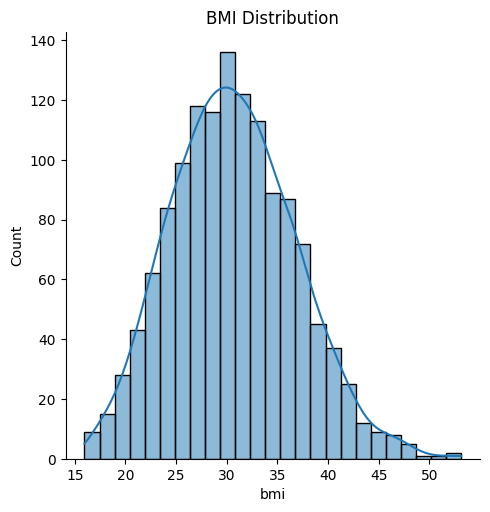

In [9]:
sns.displot(data = df, x = 'bmi', kde = True)
plt.title('BMI Distribution')
plt.show()

In [10]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### 🛠 Data Preprocessing
Machine Learning models cannot work with text data. We need to convert categorical columns (`sex`, `smoker`, `region`) into numerical values.
* **Sex:** Male = 1, Female = 0
* **Smoker:** Yes = 1, No = 0
* **Region:** Southeast = 0, Southwest = 1, Northeast = 2, Northwest = 3

In [11]:
# Encoding Categorical Columns
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [12]:
# Setting features and target variable 
X = df.drop(columns='charges', axis=1)
y = df['charges'] 

In [13]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [14]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

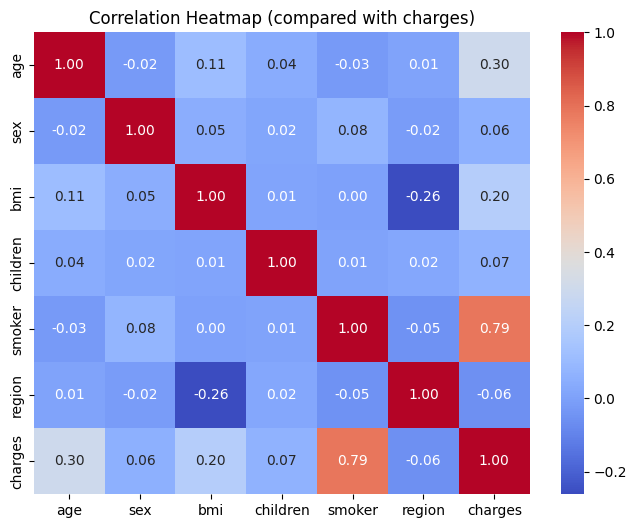

In [15]:
# Visualizing Correlations

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (compared with charges)')

plt.show()

### 💡 Key Insights from EDA
* **Smokers:** There is a strong correlation between being a smoker and having higher insurance charges.
* **Age:** Older individuals generally pay more for insurance.
* **BMI:** The distribution of BMI is fairly normal, centered around 30.

### ✂️ Splitting the Data
We split the data into **Training (80%)** and **Testing (20%)** sets.
* **Training Data:** Used to teach the model.
* **Testing Data:** Used to evaluate how well the model generalizes to new data.

In [16]:
#  Spliting the dataset with testing data having 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
X_train.shape

(1070, 6)

In [18]:
X_test.shape

(268, 6)

### 🧠 Model Training
We will use **Linear Regression** since the target variable (`charges`) is continuous.

In [19]:
#  Defining Linear Regression Model
reg = LinearRegression()

#  Fitting/Training the model 
reg.fit(X_train, y_train)

#  Store the predicted value (for training data)
train_pred = reg.predict(X_train)

#  R2 Score for training data
r2_train = metrics.r2_score(y_train, train_pred)

r2_train

0.7485289164236657

In [20]:
#  Same with testing data
test_pred = reg.predict(X_test)

r2_test = metrics.r2_score(y_test, test_pred)

r2_test

0.7569697734657099

### 📉 Model Evaluation
The R² score indicates how well the data fits the regression line.
* **Training Accuracy:** ~74%
* **Test Accuracy:** ~78%

The similarity between training and test scores suggests the model is **balanced** and not suffering from significant overfitting.

### 🔮 Building a Predictive System
Here, we input new customer data to estimate their insurance cost.

In [21]:
# Example: Age 31, Female, BMI 25.74, 0 Children, No Smoker, Southeast
input_data = (31, 0, 25.74, 0, 0, 0)

# Change input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# We create a DataFrame to ensure feature names match the training data
input_df = pd.DataFrame(input_data_reshaped, columns=X.columns)

prediction = reg.predict(input_df)

print(f"The insurance cost is estimated to be USD {prediction[0]:.2f}")

The insurance cost is estimated to be USD 3658.28
